### source @sentdex

In [33]:
import pandas as pd
import quandl, math,datetime
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import pickle



style.use('ggplot')
quandl.ApiConfig.api_key = '3yygLjxqGXzV1QmonzyW'
df = quandl.get('WIKI/GOOGL')
'''the next line prints the data in the line above'''
print(df.head())


              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [34]:
'''we need these five rows in the df to make the calculations below'''
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High']-df['Adj. Low'])/ df ['Adj. Low']* 100.0
df['PCT_CHANGE'] = (df['Adj. Close']-df['Adj. Open'])/ df ['Adj. Open']* 100.0
'''These are the columns in the df we actually need'''
df = df[['Adj. Close','HL_PCT','PCT_CHANGE','Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_CHANGE  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0


In [35]:
'''we will start the forecast here with forecast_col as input or feature'''
forecast_col = 'Adj. Close'
df.fillna(-99999,inplace = True)

forecast_out = int(math.ceil(0.1*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

#print(df.tail())
print(df.head())

            Adj. Close    HL_PCT  PCT_CHANGE  Adj. Volume       label
Date                                                                 
2004-08-19   50.322842  8.441017    0.324968   44659000.0  214.005615
2004-08-20   54.322689  8.537313    7.227007   22834300.0  210.725489
2004-08-23   54.869377  4.062357   -1.227880   18256100.0  208.072299
2004-08-24   52.597363  7.753210   -5.726357   15247300.0  218.288837
2004-08-25   53.164113  3.966115    1.183658    9188600.0  223.309335


In [36]:
#testing and training

'''this returns a new df feature droping the label'''
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately= X[-forecast_out:]# 1% of data
X = X[:-forecast_out]# 1st 99% of data

df.dropna(inplace = True)

y = np.array(df['label'])
'''lenght X must be = lenght y'''
print(len(X),len(y))

3081 3081


In [37]:
'''this is 20% of the data for testing'''
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
'''classifier is used for predictions'''
clf = LinearRegression(n_jobs=-1)
'''we can switch the algorithm using either clf abv or below'''
#clf = svm.SVR()
'''we can add a parameter, say'''
#clf = svm.SVR(kernel='poly')
clf.fit(X_train, y_train)

'''for pickle'''
with open ('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)

'''if we comment everything above from clf = ... to pickle.dump...,the code still runs'''
'''to read the pickle'''
pickle_in = open('linearregression.pickle','rb')
'''we renamed classifier here'''
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test)
'''accuracy is squared error'''
print(accuracy)


0.8824395582763527


In [38]:
'''forecasting and predicting'''
forecast_set=clf.predict(X_lately)

print(forecast_set, accuracy,forecast_out)

[ 969.22761281  961.4830089   976.48839251  985.75800896  986.34784034
  979.79674895  985.53754819  986.05076596  984.86006363  976.29628765
  995.59886089  992.1690753   981.43036539  973.02156691  961.53292374
  979.76118912  976.5247288  1000.44410197  999.19241743 1017.03644419
 1011.27955803 1024.5818391  1027.36118914 1024.31720345 1016.60530701
 1021.40506087 1019.60641644 1020.12193358 1012.55067648 1011.25525768
 1017.25500031 1011.24575426 1006.33174778  998.20838176 1017.49650314
 1013.44588056 1018.6752323  1040.96878187 1037.0664179  1033.78925146
 1040.10878619 1040.499034   1038.86272884 1035.98380467 1037.24731914
 1034.19730421 1035.04942077 1063.64431241 1064.76910827 1075.63358029
 1073.39393823 1070.23347596 1037.31486228 1028.56799716 1024.16639707
 1028.74111685 1026.64792342 1029.68000778 1039.13681746 1040.80631482
 1038.19734949 1044.76965759 1049.06592702 1050.90828255 1047.09153365
 1053.21764863 1059.5661815  1062.01629887 1065.72148175 1067.64672854
 1059.

In [39]:
#to plot the values for these 35 days on a graph
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

'''we will populate our dataframe with the new date and forecast values'''
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    '''this sets the first column as nan and the final column is i(forecast). df.loc[next_date] makes the date index. 
    The _ refers to the values in each column that are not numbers, so we have np.nan for them. then we add forecast(i) as
    our last column'''
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
print(df.head()) 



            Adj. Close    HL_PCT  PCT_CHANGE  Adj. Volume       label  \
Date                                                                    
2004-08-19   50.322842  8.441017    0.324968   44659000.0  214.005615   
2004-08-20   54.322689  8.537313    7.227007   22834300.0  210.725489   
2004-08-23   54.869377  4.062357   -1.227880   18256100.0  208.072299   
2004-08-24   52.597363  7.753210   -5.726357   15247300.0  218.288837   
2004-08-25   53.164113  3.966115    1.183658    9188600.0  223.309335   

            Forecast  
Date                  
2004-08-19       NaN  
2004-08-20       NaN  
2004-08-23       NaN  
2004-08-24       NaN  
2004-08-25       NaN  


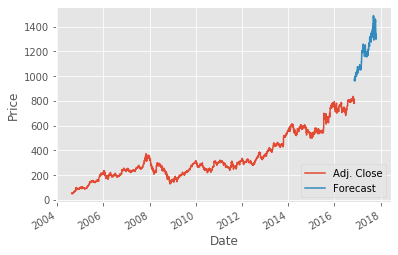

In [40]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()